# Problem Set 2

Related lectures: [Control Flow](https://datascience.quantecon.org/../python_fundamentals/control_flow.html), [Functions](https://datascience.quantecon.org/../python_fundamentals/functions.html), and [Numpy](https://datascience.quantecon.org/../scientific/numpy_arrays.html)

## Question 1
For the tuple `foo` below, use a combination of `zip`, `range`, and `len` to mimic `enumerate(foo)`.

Verify that your proposed solution is correct by converting each to a list and checking equality with `==`

HINT: You can see what the answer should look like by starting with `list(enumerate(foo))`.

In [15]:
foo = ("good", "luck!")
list(zip(range(len(foo)),foo))


[(0, 'good'), (1, 'luck!')]

[(0, 'good'), (1, 'luck!')]

## Question 2

Write a for loop that uses the lists of cities and states to print a message saying `“{city} is in {state}”`, where `{city}` and `{state}` are replaced by different values on each iteration.  You are *not* allowed to use `zip`.

In [18]:
cities = ["Phoenix", "Austin", "San Diego", "New York"]
states = ["Arizona", "Texas", "California", "New York"]

for i in range(0,len(cities)):
    print(f"{cities[i]} is in {states[i]}")


Phoenix is in Arizona
Austin is in Texas
San Diego is in California
New York is in New York


Now, do the same thing with a `for` loop using `zip`.

In [22]:
cities = ["Phoenix", "Austin", "San Diego", "New York"]
states = ["Arizona", "Texas", "California", "New York"]

for i in list(zip(cities, states)):
    print(f"{i[0]} is in {i[1]}")


Phoenix is in Arizona
Austin is in Texas
San Diego is in California
New York is in New York


Write a function that takes in a tuple as `(city, state)` and returns a string  `“{city} is in {state}”` with the values substituted.

In [24]:
def func(tuple):
    print(f"{tuple[0]} is in {tuple[1]}")

## Question 3

This exercise explores the concept of higher order functions, or functions
that can be an input or output of another function.

Below is code that implements a version of the generalized Cobb-Douglas production function which takes the form $ F(K, L) = z K^{\alpha_1} L^{\alpha_2} $.

It takes as an argument `alpha_1`, `alpha_2`, and `z` and then
*returns a function* that implements that parameterization of the
Cobb-Douglas production function.

In [6]:
def cobb_douglas_factory(alpha_1, alpha_2, z=1.0):
    """
    Return a function F(K, L) that implements the generalized Cobb-Douglas
    production function with parameters alpha_1, alpha_2, and z

    The returned function takes the form F(K, L) = z K^{\alpha_1} L^{\alpha_2}
    """
    # I'm defining a function inside a function
    def return_func(K, L):
        return z * K**alpha_1 * L**alpha_2

    # Notice I'm returning a function! :mind_blown:
    return return_func

We can use this function in two steps:

1. Call it with `alpha_1`, `alpha_2`, and `z` and get a function in return.  
1. Call the returned function with values of `K` and `L`.  


Here’s how we would repeat the first Cobb-Douglas example from above:

In [7]:
# step 1
F2 = cobb_douglas_factory(0.33, 1-0.33)

# step 2
F2(1.0, 0.5)

0.6285066872609142

Now, it is your turn…

Re-write the `returns_to_scale` function above as we had in [Functions](https://datascience.quantecon.org/../python_fundamentals/functions.html) to accept an additional argument
`F` that represents a production function. The function should take in `K` and `L`
and return output.

We’ve written some code below to get you started.

In [8]:
def returns_to_scale2(F, K, L, gamma):
    y1 = F(K, L)
    y2 = F(gamma*K, gamma*L)
    y_ratio = y2 / y1
    return y_ratio / gamma

Test out your new function using the original `F2` that we defined above and
using the `cobb_douglas` function defined earlier in the lecture. You can use
similar sets of values to what we used in class for `K` and `L`.

Do you get the same answer?

## Question 4

Let’s use our `cobb_douglas_factory` and `returns_to_scale2` functions
to study returns to scale.

What are the returns to scale when you set `alpha_1 = 0.3` and `alpha_2 = 0.6`?

In [29]:
# test with alpha_1 = 0.3 and alpha_2 = 0.6
F = cobb_douglas_factory(0.3, 0.6)
returns_to_scale2(F, 1, 0.5, 2)

0.9330329915368075

What about when you use `alpha_1 = 0.4` and `alpha_2 = 0.65`?

In [30]:
# test with alpha_1 = 0.4 and alpha_2 = 0.65
F = cobb_douglas_factory(0.4, 0.65)
returns_to_scale2(F, 1, 0.5, 2)

1.0352649238413774

What do returns to scale have to do with the quantity $ \alpha_1 + \alpha_2 $? When will returns to scale be greater or less than 1?

In [11]:
# your code here (optional)


When $\gamma^{\alpha_1}*\gamma^{\alpha_2} < \gamma$, returns to scale will be less than 1.
When $\gamma^{\alpha_1}*\gamma^{\alpha_2} > \gamma$, returns to scale will be greater than 1.

## Question 5

Take a production function of only labor, `L`, with the following form

$$
f(L) = \begin{cases} L^2 & \text{ for } L \in [0, 1)\\
                    \sqrt{L} & \text{ for } L \in [1, 2]
        \end{cases}
$$

Write a function to calculate the marginal product of labor (MPL) numerically by using a method similar to what we did in class.

In [10]:
def marginal_products(F, K, L, epsilon):
    cobb_douglas = F(K, L)
    mpl = (cobb_douglas(K, L + epsilon) - cobb_douglas(K, L)) / epsilon
    mpk = (cobb_douglas(K + epsilon, L) - cobb_douglas(K, L)) / epsilon
    return mpl, mpk

Plot the MPL for $ L \in [0,2] $  (you can choose some sort of grid over those numbers with `np.linspace`).

TypeError: 'float' object is not callable

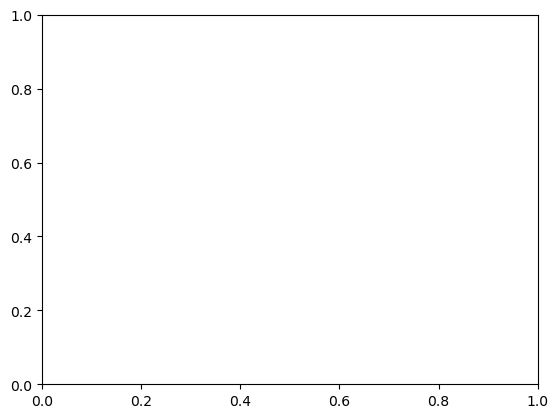

In [9]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()

# Step 2
F = cobb_douglas_factory(0.3, 0.6)
x = np.linspace(0, 2, 100)
y = marginal_products(F, 1.0, 0.5,  1e-4)

# Step 3
ax.plot(x, y)

Consider the scenario where you increase the scale of production by a factor of 10 percent more labor. Plot the returns to scale for a grid on $ L \in [0, 1.5] $.
*Hint:* For this, you may need to write your own version of the `returns_to_scale` function specific to this production function or carefully use the one above. Either way of implementation is fine.

In [14]:
# your code here

Compare these returns to the scale of the Cobb-Douglas functions we have worked with.

## Question 6

Define a function that takes as input a list $y$ *of arbitrary length* that contains the monthly returns of an asset, (where each element in the list represents the returns in that month) along with a keyword argument for your monthly discount rate with the default value $r=0.05$, and returns the present daily value of the asset.

In [5]:
# your code here

Use your function to answer the following question:

If you had a monthly discount factor of $r=0.1$, what is the most that you should pay for an asset that pays dividends of: $\$1$ immediately when purchasing, $\$10$ after the first month, $\$14$ after the second month, $\$18$ after three months, and finally $\$100$ after six months?

In [ ]:
# your code here